It should be pretty self explanatory that this may not safe for work.

What subreddits' comments have the most fucks to say? I'm interested specifically in the subreddits with the most active communities, so I'll single out all subreddits that have over 100k comments in the month of February 2017.

Note: I lowercase the comments before looking, and the script picks up on all variations that include "fuck." Here's the SQL code I used to generate a dataset with all comments from the Feb 2017 dataset of reddit comments you can find [here on BigQuery](https://bigquery.cloud.google.com/table/fh-bigquery:reddit_comments.2017_02?tab=details).

First, I grabbed the count of all comments on each subreddit using this SQL code.
```sql
#standardSQL
SELECT
  count(id), subreddit
FROM
  `fh-bigquery.reddit_comments.2017_02`
GROUP BY
  subreddit
```

I then grabbed all comments that had fuck. I grabbed all of the information from them.
```sql
#standardSQL
SELECT
  * 
FROM
  `fh-bigquery.reddit_comments.2017_02`
WHERE
  LOWER(body) LIKE "%fuck%";
```

I then used that dataset and counted the number of comments with fuck in each data-set. I used all of these querys on BigQuery, transferred them over using CloudStorage, then downloaded them.
```sql
#standardSQL
SELECT
  count(id), subreddit
FROM
  `reddit-comments-161523.reddit_comments.results_20170314_170223`
GROUP BY
  subreddit
```

In [1]:
import pandas as pd
all_comments_by_sub = pd.read_csv("all_comments_by_sub.csv")
fuck_comments_by_sub = pd.read_csv("fuck_comments_by_sub.csv")

In [6]:
fuck_comments_by_sub['total_fuck_comments'] = fuck_comments_by_sub['f0_']
fuck_comments_by_sub = fuck_comments_by_sub.drop(['f0_'], axis=1)
all_comments_by_sub['total_comments'] = all_comments_by_sub['f0_']
all_comments_by_sub = all_comments_by_sub.drop(['f0_'], axis=1)

In [9]:
fuck_df = all_comments_by_sub.merge(fuck_comments_by_sub, how = 'left', on='subreddit')

In [10]:
fuck_df['ratio_of_fuck'] = fuck_df['total_fuck_comments'] / fuck_df['total_comments']

In [35]:
test = fuck_df[fuck_df['total_comments'] > 100000].sort_values('ratio_of_fuck', ascending=False)

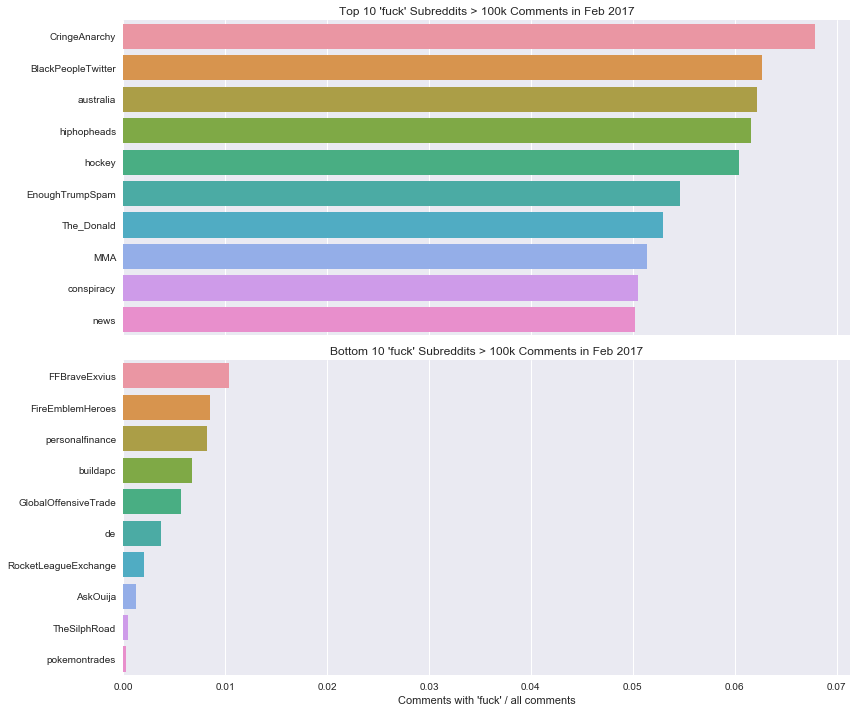

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


f, axarr = plt.subplots(2, sharex=True, figsize=(12,10))

sns.barplot(x='ratio_of_fuck', y='subreddit', data=test[:10], ax=axarr[0])
axarr[0].set_title("Top 10 'fuck' Subreddits > 100k Comments in Feb 2017")
axarr[0].set_xlabel("")
axarr[0].set_ylabel("")
sns.barplot(x='ratio_of_fuck', y='subreddit', data=test[89:], ax=axarr[1])
axarr[1].set_title("Bottom 10 'fuck' Subreddits > 100k Comments in Feb 2017")
axarr[1].set_ylabel("")
axarr[1].set_xlabel("Comments with 'fuck' / all comments")
plt.tight_layout()
#plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.savefig("SubredditsAndFuck", dpi=300)
plt.show()

It seems cringe, australia, politics, hockey, MMA, among other things generate the most "fuck"s in the comments. For all in the top 10, on average, at least every 20th comment will have a fuck.

For the lowest large subreddits, on average, every 100th comment will have "fuck"s.

Here's the middle 10.

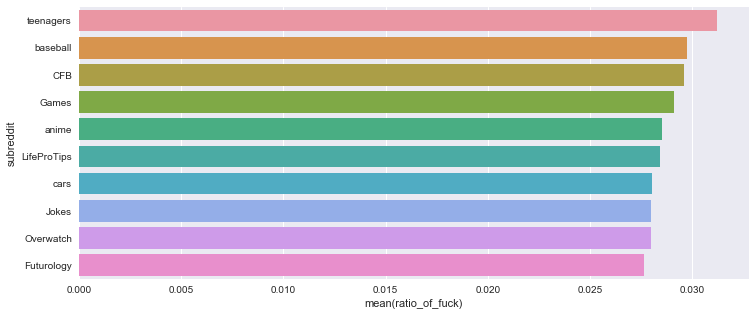

In [92]:
plt.figure(figsize=(12,5))
sns.barplot(x='ratio_of_fuck', y='subreddit', data=test[45:55])
plt.show()

I plan to return to this dataset and do some NLP to answer a few more fun questions.

1. What variations of "fuck" do redditors use most often? What part of speech?
2. If used as a verb, what are the most common subjects and objects of "fuck"ing?

Thanks for reading, I hope you enjoyed!